# p-value

The p-value is a commonly used quantity in statistical testing that quantitifies if a observed outcome of an experiment is signficant or due to chance. Specifically, it quantifies the likelihood of observing a test statistic or a more extreme value by chance, under the null hypothesis.

The aim of this notebook is to demonstrate the idea of p-values by simulations.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.stats import norm

## Error of an Estimator

Statistical hypothesis testing is a method to draw conclusions from observations (for details, see [wiki](https://en.wikipedia.org/wiki/Statistical_hypothesis_testing)). One application is to quantify the amount of randomness in an estimation.

In general, an estimate is an approximation of an unknown quantity R based on a set of instances $x_i$ drawn from a distribution $p_i(x_i)$. Typically, we assume that the instances are drawn independently from one common distribution $p(x)$.

As a running example, we assume that we want to estimate the head probability of a coin from a sample of size n- statistically speaking the expected value of a Bernoulli distribution $p(x)$.

In [2]:
R = 0.3  # true, unknown expected value of the data distribution p(x)
n = 15  # sample size

def draw_observations(num_observations, num_experiments):
    return 1.0*(np.random.rand(num_observations, num_experiments) < R)

xs = draw_observations(n, 1)[:,0]
print "x_1,...,x_n=", xs

x_1,...,x_n= [ 1.  0.  0.  1.  0.  0.  1.  0.  0.  1.  0.  1.  0.  1.  0.]


The procedure of calculating an estimate is called estimator. A simple estimator for the expected value of $p(x)$ is to take the sample mean of the drawn instances.

In [3]:
def estimate(observations):
    return observations.mean(axis=0)

R_est = estimate(xs)
print "estimated R:", R_est

estimated R: 0.4


Since, sampling instances $x_i$ from a distribution $p(x)$ is a random process, an estimate is a random variable, whose distribution depends on $p(x)$; the estimate can change every time:

In [4]:
for i in range(10):
    xs = draw_observations(n, 1)[:,0]
    R_est = estimate(xs)
    print "sample:", xs, "estimate:", R_est

sample: [ 0.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.] estimate: 0.266666666667
sample: [ 0.  0.  0.  0.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  1.] estimate: 0.2
sample: [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  1.] estimate: 0.133333333333
sample: [ 0.  1.  0.  0.  0.  1.  0.  0.  0.  1.  0.  0.  1.  0.  1.] estimate: 0.333333333333
sample: [ 0.  1.  0.  0.  1.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.] estimate: 0.2
sample: [ 0.  1.  1.  1.  1.  1.  1.  0.  1.  0.  1.  0.  0.  1.  1.] estimate: 0.666666666667
sample: [ 1.  0.  0.  1.  0.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.] estimate: 0.266666666667
sample: [ 0.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  1.  0.  1.  0.] estimate: 0.266666666667
sample: [ 1.  1.  1.  1.  0.  0.  0.  0.  1.  1.  0.  0.  0.  1.  0.] estimate: 0.466666666667
sample: [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.] estimate: 0.0666666666667


The quality of the estimation can be quantified by the squared deviation of the estimator from the true value $R$ in expectation over the drawn sample. The bias-variance decomposition tells us that the source of the estimation error is two-fold:

E[(R-estimate)²] = Bias²[estimate] + Var[estimate]

The bias is a systematic error (the expected estimate is not our quantity of interest). The variance measures how far a set of observations are spread out from their mean. Note that the expectations are not taken w.r.t. instance distribution p(x) (and E[estimate] is not the expected value of the distribution $p(x)$, which is R). 

In the following, we estimate the expectations of an estimator w.r.t. the random estimation process by simulating the estimation procedure multiple times.

Analysis for n=15
- estimates: [ 0.2         0.06666667  0.33333333 ...,  0.06666667  0.46666667
  0.33333333]
- E[estimate]: 0.30028
- Bias²[estimate]: 7.84000000118e-08
- Var[estimate]: 0.0139928104889
- MSE[estimate]: 0.0139928888889


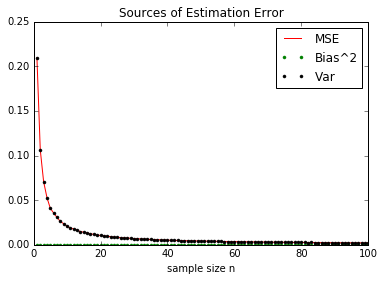

In [5]:
num_experiments = 10000
samples = draw_observations(n, num_experiments)
estimates = estimate(samples)

print "Analysis for n=%d" % n
print "- estimates:", estimates
print "- E[estimate]:", estimates.mean()
print "- Bias²[estimate]:", (estimates.mean()-R)**2
print "- Var[estimate]:", estimates.var()
print "- MSE[estimate]:", ((estimates-R)**2).mean()

n_grid = range(1, 100+1)
biases, variances, mses = [], [], []
for i in n_grid:
    samples = draw_observations(i, num_experiments)
    estimates = estimate(samples)
    biases.append((estimates.mean()-R)**2)
    variances.append(estimates.var())
    mses.append(((estimates-R)**2).mean())

plt.plot(n_grid, mses, color='red')
plt.plot(n_grid, biases, '.', color='green')
plt.plot(n_grid, variances, '.', color='black')
plt.xlabel('sample size n')
plt.title('Sources of Estimation Error')
plt.legend(['MSE', 'Bias^2', 'Var'])

The sample mean is an unbiased (E[estimate]=R) estimate of the expected value of p(x). That means the the estimation error is soley due to the estimators variance. For more complicated quantities of interest or processes (e.g., importance sampling) it can be beneficial to prefer an estimator with a small bias. However, this bias should vanish when the number of drawn instances increases (consistent estimator).

## Distribution of an Estimators

In order to quantify the accuracy of a single estimate, we need to understand the estimator's distribution. Given that we have an estimate of 0.5, we want to state how likely is this outcome, when the true quantity is actually 0.3. Recall that the random variable is the estimator and not the true quantity; the statement "given that we have estimated 0.5, what is the probability that the true value is 0.3" is tricky.

We have seen that the error decreases with the number of instances (in our case in the order of 1/n). In order to study the shape of the estimator's distribution, we also consider a normalized estimate that ignores the expected value and normalized the variance of the estimator.

In [6]:
def normalize_estimates(unnormalized_estimates, n):
    true_var = R*(1-R)
    return (unnormalized_estimates-R)*np.sqrt(n*true_var)

Now, let's consider the empirical distributions of the estimator depending on the sample size.

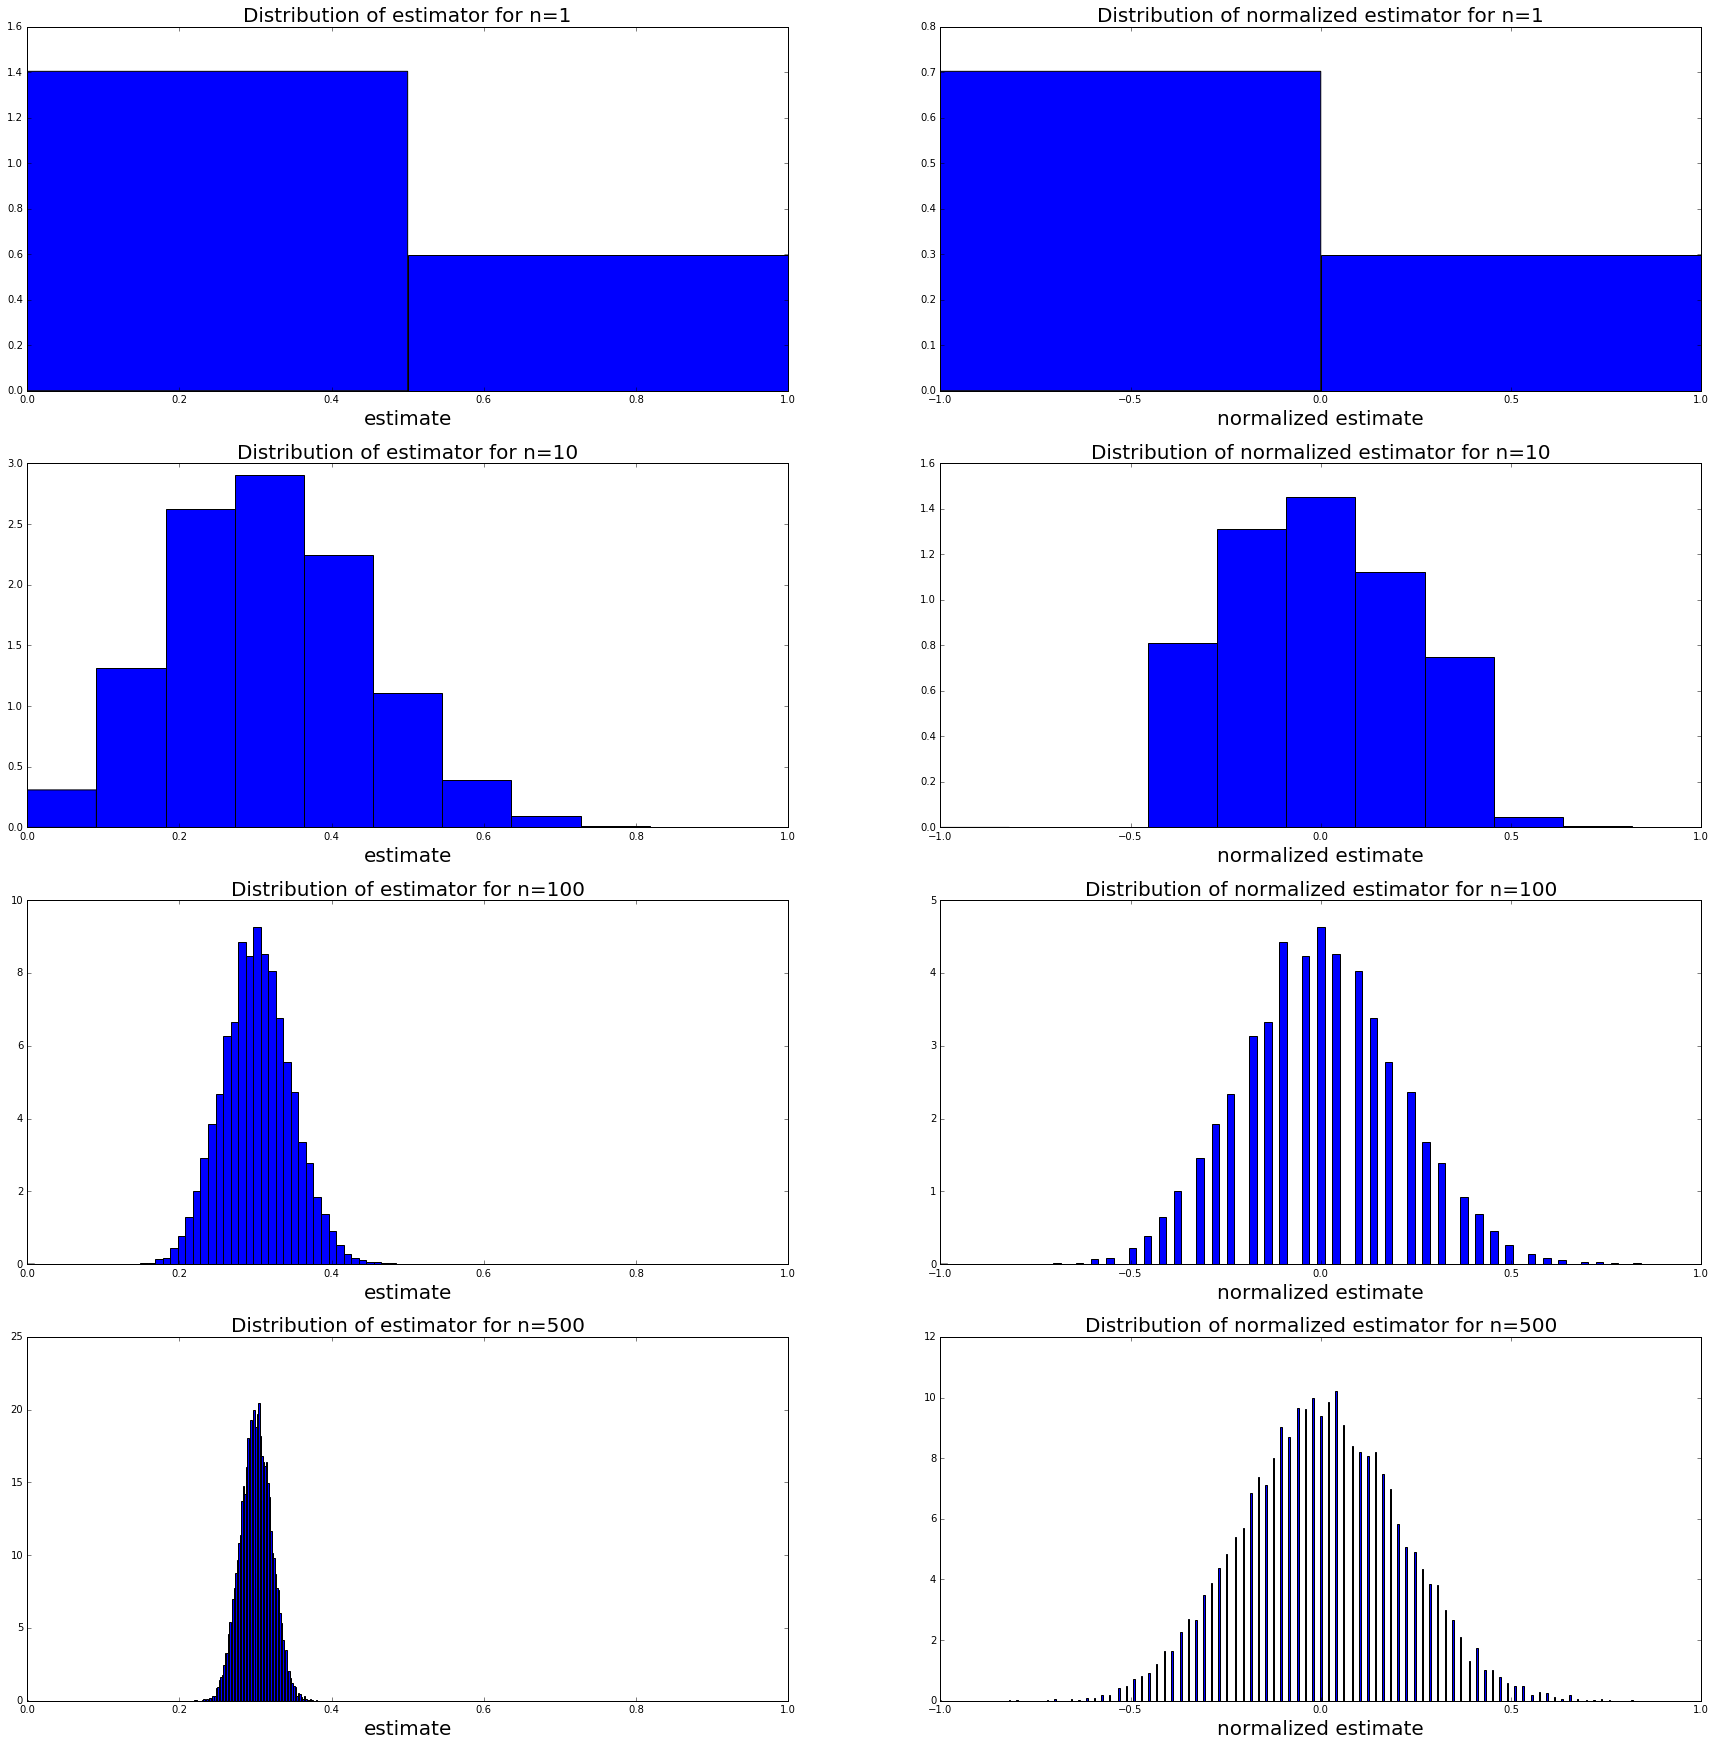

In [7]:
n_grid = [1, 10, 100, 500]
f, ax = plt.subplots(len(n_grid), 2, sharey=False, figsize=(30,30))
for i in range(len(n_grid)):
    n = n_grid[i]
    estimates = estimate(draw_observations(n, num_experiments))
    ax[i][0].hist(estimates, normed=True, bins=np.linspace(0, 1, n+2))
    ax[i][0].set_xlabel('estimate', fontsize=20);
    ax[i][0].set
    ax[i][0].set_title('Distribution of estimator for n=%d' % (n), fontsize=20)
    
    ax[i][1].hist(normalize_estimates(estimates, n), normed=True, bins=np.linspace(-1, 1, n+2))
    ax[i][1].set_xlabel('normalized estimate', fontsize=20);
    ax[i][1].set_title('Distribution of normalized estimator for n=%d' % (n), fontsize=20)

For a sample size of 1, the estimators distribution is equal to the sample distribution (in our specific case of the mean as an estimator of the expected value). In general, our estimator follows a binomial distribution Bin(n, R). Based on that knowledge, we can derive the likelihood of our estimate. Specifically, the Clopper-Pearson confidence interval consists of a lower L and and upper U bound. For a given confidence 1-alpha, the parameters $L<estimate<U$ are chosen s.t. $p(L<estimate)=alpha/2$ and $p(estimate>U)=alpha/2$.

A more flexible alternative are confidence intervals that are based on the normal approximation (Wald test) or on the t-distribution (t-test). Because we know that the distribution of the mean converges to a normal distribution (central limit theorem), we do not need to know the actual distribution p(x). Note that the speed of convergence depends on the skewness of p(x) (Berry–Esseen theorem). Based on that, we can approximate the estimator's distributor:

(estimate-R) / sqrt(Var[estimate]) = N(0, 1)

Then, the cumulative distribution function of the standard normal distribution tells us the probability alpha of a certain value.

In [8]:
n = 500
samples = draw_observations(n, 1)
est = estimate(samples)[0]
est_var = samples.var() / n

# how likely would be the estimate if the expected value (actual quantity) is be 1/3
R_alt = 1./3
err = np.abs(R_alt-est)  # normal is symmetric

alpha2 = norm.cdf((-err)/ np.sqrt(est_var))
print "The likelihood of observing an estimate of %3.3f if R=%3.3f is %3.3f." % (est, R_alt, alpha2)

The likelihood of observing an estimate of 0.294 if R=0.333 is 0.027.


Now, we can determine the probability of (estimate+eps) or larger and (estimate-eps) or smaller, or, that [estimate-eps, estimate+eps] captures the true value R with a probability of 1-alpha. eps can be determined via the inverse cumulative distribution function.

In [9]:
alpha = 0.05  # in 5% of all experiments the confidence interval do not capture the true value
eps = norm.ppf(1-alpha/2.)*np.sqrt(est_var)
print "The likelihood that [%3.3f, %3.3f] captures R=%3.3f is %3.3f." % (est-eps, est+eps, R, 1-alpha)

The likelihood that [0.254, 0.334] captures R=0.300 is 0.950.


An evaluation of the accuracy of the these confidence intervals are studied [here](https://github.com/BigCrunsh/ipython-notebooks/blob/master/notebooks/confidence_interval.ipynb).

## Finally, the p-value

TODO